# Solve Online Advertising Problem with Epsilon Greedy

## Create Environment

This code simulates an environment for online advertising using the concept of Bernoulli Bandits. In online advertising, companies often need to decide which ad to display to users in real-time to maximize their click-through rates (CTR) or other performance metrics. The Bernoulli Bandit model is a simplified framework that represents this problem.

### Code Description

#### Constructor:
- The `BernoulliBandit` class has a constructor `__init__(self, p)` that takes a single parameter `p`.
- The parameter `p` represents the probability of a user clicking on the ad when it is displayed. It is a value between 0 and 1.

#### Method: `display_ad()`
- The `display_ad()` method simulates displaying the ad to a user and returns the outcome of the ad display as a binary value (0 or 1).
- It uses the `numpy.random.binomial(n=1, p=self.p)` function to model the Bernoulli distribution with a single trial (n=1).
- The parameter `p` determines the probability of success (click) for the Bernoulli distribution.

In [1]:
import numpy as np

class BernoulliBandit(object):
    def __init__(self, p):
        self.p = p

    def display_ad(self):
        reward = np.random.binomial(n=1, p=self.p)
        return reward

In this code, five different ads (`adA`, `adB`, `adC`, `adD`, and `adE`) are created as instances of the `BernoulliBandit` class, each with its own click-through probability (`p`). These probabilities represent how likely a user is to click on the respective ad when displayed.

The `ads` list contains all the ad instances, allowing for easy management and comparison of different ads.

In [2]:
adA = BernoulliBandit(0.004)
adB = BernoulliBandit(0.016)
adC = BernoulliBandit(0.02)
adD = BernoulliBandit(0.028)
adE = BernoulliBandit(0.031)
ads = [adA, adB, adC, adD, adE]

In the context of online advertising, each ad instance in the ads list represents a different ad creative that the company wants to test. The goal is to determine which ad has the highest click-through rate (CTR) or conversion rate.

To simulate the online advertising process, the company can use the display_ad() method of each ad instance to obtain a reward (0 or 1) based on the Bernoulli distribution with the corresponding click-through probability. The company can then analyze the rewards obtained for each ad and use the results to make informed decisions about which ad(s) to display more frequently to maximize their overall performance.

## Epsilon-Greedy Strategy for Online Advertising

In this section, we delve into the practical implementation of the epsilon-greedy strategy to tackle the challenges posed by the online advertising problem. The epsilon-greedy strategy serves as a potent tool for effectively addressing the trade-off between exploration and exploitation in choosing ad variations to present to users. The primary objective remains to enhance click-through rates (CTR) or other essential performance metrics while accounting for user behavior's inherent unpredictability.

### Epsilon-Greedy Strategy Explained
The epsilon-greedy strategy encompasses the following fundamental steps:

#### 1. Initialization:
- We initialize arrays for action values (`Q`) and total impressions (`N`) for each ad variation.
- `eps` is a vital parameter, representing the exploration rate (epsilon) that influences the strategy's behavior.

#### 2. Ad Selection:
- The selection of the ad variation to display is pivotal. If a randomly generated number is less than or equal to `eps`, the strategy explores by choosing a random ad variation.
- Conversely, if the random number is greater than `eps`, the strategy exploits by selecting the ad variation with the highest action value (`Q`).

#### 3. Observing Rewards and Updating Values:
- We observe the reward obtained from the displayed ad variation and subsequently update the action value (`Q`) and total impressions (`N`) associated with that ad.

#### 4. Calculating Rewards:
- The total reward obtained from the displayed ads is continuously calculated and updated.
- The average reward obtained up to that point in time is also computed and recorded.

By running the epsilon-greedy strategy with different epsilon values (`0.01`, `0.05`, `0.1`, `0.2`), we can compare and analyze the strategy's performance under various exploration-exploitation trade-offs.

#### Epsilon = 0.1

In [3]:
eps = 0.1
n_prod = 100000
n_ads = len(ads)
Q = np.zeros(n_ads)
N = np.zeros(n_ads)
total_reward = 0
avg_rewards = []

In [4]:
import pandas as pd

ad_chosen = np.random.randint(n_ads)
for i in range(n_prod):
    R = ads[ad_chosen].display_ad()
    N[ad_chosen] += 1
    Q[ad_chosen] += (1 / N[ad_chosen]) * (R - Q[ad_chosen])
    total_reward += R
    avg_reward_so_far = total_reward / (i + 1)
    avg_rewards.append(avg_reward_so_far)

    # select next ad to display
    if np.random.uniform() <= eps:
        ad_chosen = np.random.randint(n_ads)
    else:
        ad_chosen = np.argmax(Q)


df_reward_comparison = pd.DataFrame()
df_reward_comparison['e-greedy: {}'.format(eps)] = avg_rewards

#### Epsilon = 0.2

In [5]:
eps = 0.2
n_prod = 100000
n_ads = len(ads)
Q = np.zeros(n_ads)
N = np.zeros(n_ads)
total_reward = 0
avg_rewards = []

import pandas as pd

ad_chosen = np.random.randint(n_ads)
for i in range(n_prod):
    R = ads[ad_chosen].display_ad()
    N[ad_chosen] += 1
    Q[ad_chosen] += (1 / N[ad_chosen]) * (R - Q[ad_chosen])
    total_reward += R
    avg_reward_so_far = total_reward / (i + 1)
    avg_rewards.append(avg_reward_so_far)

    # select next ad to display
    if np.random.uniform() <= eps:
        ad_chosen = np.random.randint(n_ads)
    else:
        ad_chosen = np.argmax(Q)

df_reward_comparison['e-greedy: {}'.format(eps)] = avg_rewards

#### Epsilon = 0.01

In [6]:
eps = 0.01
n_prod = 100000
n_ads = len(ads)
Q = np.zeros(n_ads)
N = np.zeros(n_ads)
total_reward = 0
avg_rewards = []

import pandas as pd

ad_chosen = np.random.randint(n_ads)
for i in range(n_prod):
    R = ads[ad_chosen].display_ad()
    N[ad_chosen] += 1
    Q[ad_chosen] += (1 / N[ad_chosen]) * (R - Q[ad_chosen])
    total_reward += R
    avg_reward_so_far = total_reward / (i + 1)
    avg_rewards.append(avg_reward_so_far)

    # select next ad to display
    if np.random.uniform() <= eps:
        ad_chosen = np.random.randint(n_ads)
    else:
        ad_chosen = np.argmax(Q)

df_reward_comparison['e-greedy: {}'.format(eps)] = avg_rewards

#### Epsilon = 0.05

In [7]:
eps = 0.05
n_prod = 100000
n_ads = len(ads)
Q = np.zeros(n_ads)
N = np.zeros(n_ads)
total_reward = 0
avg_rewards = []

import pandas as pd

ad_chosen = np.random.randint(n_ads)
for i in range(n_prod):
    R = ads[ad_chosen].display_ad()
    N[ad_chosen] += 1
    Q[ad_chosen] += (1 / N[ad_chosen]) * (R - Q[ad_chosen])
    total_reward += R
    avg_reward_so_far = total_reward / (i + 1)
    avg_rewards.append(avg_reward_so_far)

    # select next ad to display
    if np.random.uniform() <= eps:
        ad_chosen = np.random.randint(n_ads)
    else:
        ad_chosen = np.argmax(Q)

df_reward_comparison['e-greedy: {}'.format(eps)] = avg_rewards

### Plot

In [ ]:
import cufflinks as cf
import plotly.offline

cf.go_offline()
cf.set_config_file(world_readable=True, theme="white")

greedy_list = ['e-greedy: 0.01', 'e-greedy: 0.05', 'e-greedy: 0.1', 'e-greedy: 0.2']
df_reward_comparison[greedy_list].iplot(title="ε-Greedy Actions", dash=['solid', 'dash', 'dashdot', 'dot'])
xTitle='Impressions'
yTitle='Avg. Reward'

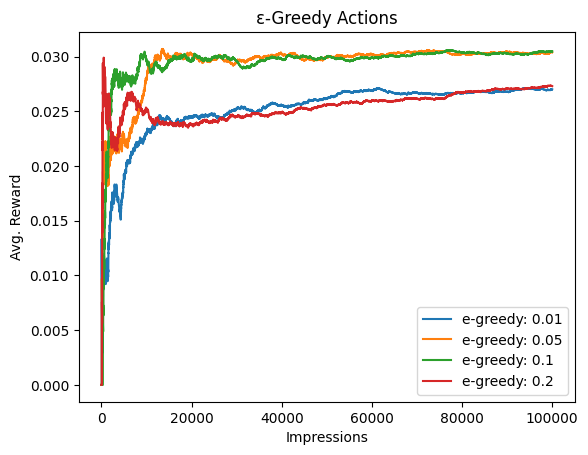

In [8]:
import matplotlib.pyplot as plt

# Create a figure and axis object
fig, ax = plt.subplots()

# Plot the average rewards for each epsilon value
for epsilon in greedy_list:
    ax.plot(df_reward_comparison.index, df_reward_comparison[epsilon], label=epsilon)

# Set plot title and axis labels
ax.set_title("ε-Greedy Actions")
ax.set_xlabel('Impressions')
ax.set_ylabel('Avg. Reward')

# Show the legend
ax.legend()

# Display the plot
plt.show()